<a href="https://colab.research.google.com/github/IshanSharma1132/Retail_sales_prediction_Regression/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **REGRESSION** 



#####    
##### **INDIVIDUAL/TEAM**    
##### **-Virender Chib**
##### **-Ishan Sharma**


# **Project Summary -**





Rossman Sales Prediction data is a data set that contain historical sales data for a retail store chain. The data includes information about the store, such as Competitor’s Detail, type, holiday’s, as well as number of the customers and sales transaction, such as the date, time, and amount of sale on each day.

In this project we have done the following:
 

*   Analysing the data for Null and Duplicate values and tackling them using different techniques
*   Merging dataframes
*   Handling Outliers and correcting the data types
* Exploratory Data Analysis (EDA)
* Hypothesis Testing between Categorical and Numerical variables
* Categorical Encoding
* Feature Manipulation
* Scaling the data using Standard Transform
* Splitting the data
* Training different models
* <b>Explained our final model using LIME<b>
* <b>Pickled the best performing model for future use

<b>At the end of this notebook, we have also presented our Conclusion <b>






# **GitHub Link -**

# **Problem Statement**


A Rossmann is a private drug store chain based in Germany, with main operations on Europe. Operates over **3,000 drug stores in 7 different contries**. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for **1,115** Rossmann stores. The task is to forecast the **"Sales"** column for the test set. Note that some record stores in dataset were temporarily closed for renovations.


#### **Define Your Business Objective?**

Analyse the historical sales data for 1,115 Rossmann stores and build a machine learning model to forecast the sales of each Rossmann store upto 6 weeks.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## ***1. Know Your Data***

In [60]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

#importing Standard scaler
from sklearn.preprocessing import StandardScaler

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# importing libary for VIF calcualtions
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing stats library for hypothesis testing
import scipy.stats
from scipy.stats import chi2

# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# import elastic net regression from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# importing pickle library to save our final model
import pickle

# import lime for model explainability
!pip install lime;
import lime
import lime.lime_tabular

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df_rossmann = pd.read_csv("/content/drive/MyDrive/Capstone project - Regression analysis/Rossmann Stores Data.csv")
df_store = pd.read_csv("/content/drive/MyDrive/Capstone project - Regression analysis/Copy of store.csv")

# **Data set First Review**





In [63]:
# Dataset First Look
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [64]:
df_rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [65]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [66]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# **Dataset Rows and Columns Count**

In [67]:
# Total No. of rows and column in rossmanns dataframe
num_of_rows = df_rossmann.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = df_rossmann.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1017209
Total no. of columns: 9


In [68]:
# total number of rows in store dataframe
num_of_rows = df_store.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = df_store.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1115
Total no. of columns: 10


# **Dataset information**

In [69]:
# Rossmann Dataset Info
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [70]:
# Store Dataset info
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# **Duplicate Values**

In [71]:
# number of duplicate rows
num_of_dup_rows = df_rossmann.duplicated(["Store","Date"]).sum()
print(f"No. of duplicate rows in rossmann dataset: {num_of_dup_rows}")

No. of duplicate rows in rossmann dataset: 0


In [72]:
num_of_dup_rows = df_store.duplicated(["Store"]).sum()
print(f"No. of duplicate rows in store dataset: {num_of_dup_rows}")

No. of duplicate rows in store dataset: 0


# **Missing Values/Null Values**





In [73]:
# Missing Values/Null Values Count
df_rossmann.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [74]:
df_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The rossmann dataset does not contain null values but the store dataset have null values in dataset.So, we will deal these null values in future.

In [75]:
# importing missingo library which helps us to visualize the missing values
import missingno as msno

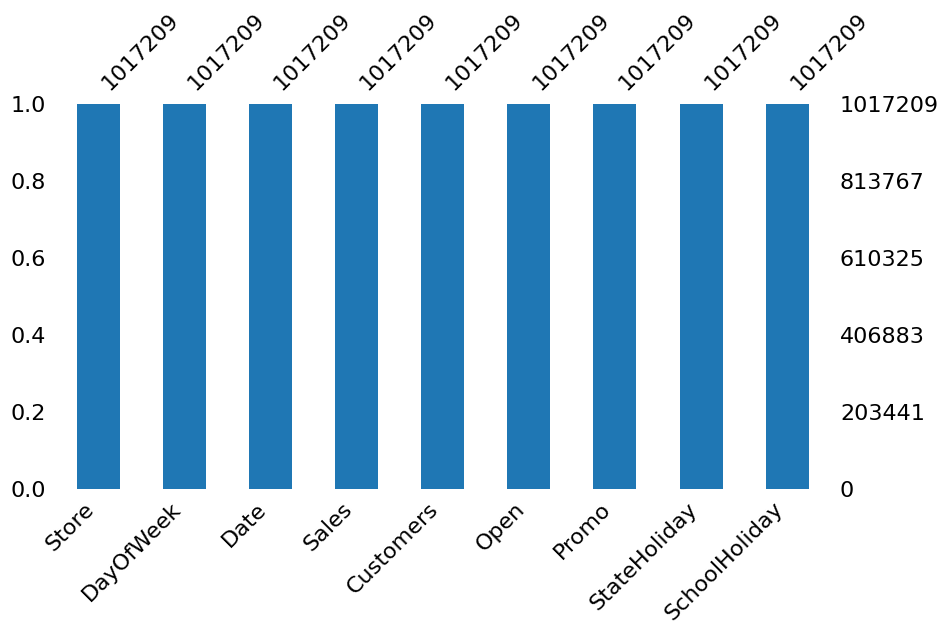

In [76]:
# Visualizing the missing values in Rossmann dataset
msno.bar(df_rossmann,figsize=(10,5), color="tab:Blue");

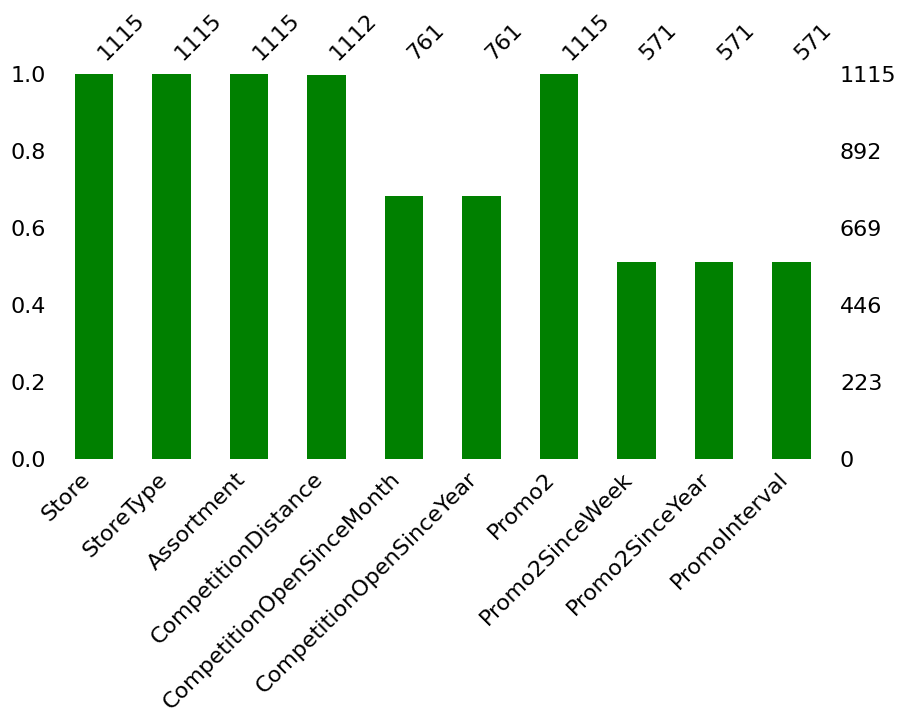

In [77]:
# Visualizing the missing values in Store dataset
msno.bar(df_store,figsize=(10,5),color="green");

In [78]:
# define a DataFrame to find the number and percentage of missing values in a dataframe
df_null_store = pd.DataFrame((df_store.isna().sum()/df_store.shape[0])*100)
df_null_store["count"] = list(df_store.isna().sum().values)
df_null_store.rename(columns={0:"% of Null Values"},inplace=True)
df_null_store.sort_values(by = ["count"],ascending = False)

,% of Null Values,count
Promo2SinceWeek,48.789238,544
Promo2SinceYear,48.789238,544
PromoInterval,48.789238,544
CompetitionOpenSinceMonth,31.748879,354
CompetitionOpenSinceYear,31.748879,354
CompetitionDistance,0.269058,3
Store,0.000000,0
StoreType,0.000000,0
Assortment,0.000000,0
Promo2,0.000000,0


# **What did you know about your dataset?**

1. Store dataframe contains 10 columns.
2. Six columns have missing values in them.
3.Four columns requires conversion of datatypes.
4.Additionally, new columns need to be added from existing ones to make  sure that the analysis gets easier.

# **Uderstanding your Variables**

In [79]:
# Dataset Columns
list(df_rossmann.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [80]:
list(df_store.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [81]:
#Rossmann Dataset Describe
df_rossmann.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [82]:
# Store dataset describe
df_store.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


# **Variable Description**


* Store - Store ID
* Sales - Sales for the given store on a given day (to be predicted)
* Customers - the number of customers on a given day (to be dropped)
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - 4 different store types: a, b, c, d
* Assortment - Assortment level: a = basic, b = extra, c = extended. Represents the number and type of products displayed by the store
* CompetitionDistance - distance to the nearest competitor store
* CompetitionOpenSince[Month/Year] - Approximate year and month of the time the nearest competitor was opened
* Promo - Show if a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - The year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store 

# **Check Unique Values for each variable**

In [83]:
# Check Unique Values for each variable.
df_rossmann.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [84]:
#unique values in df_store
df_store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

# **Data Wrangling**

**(a) Null Values Treatment**

In [85]:
#checking rows with null values in CompetitionDistance column
df_store[df_store["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


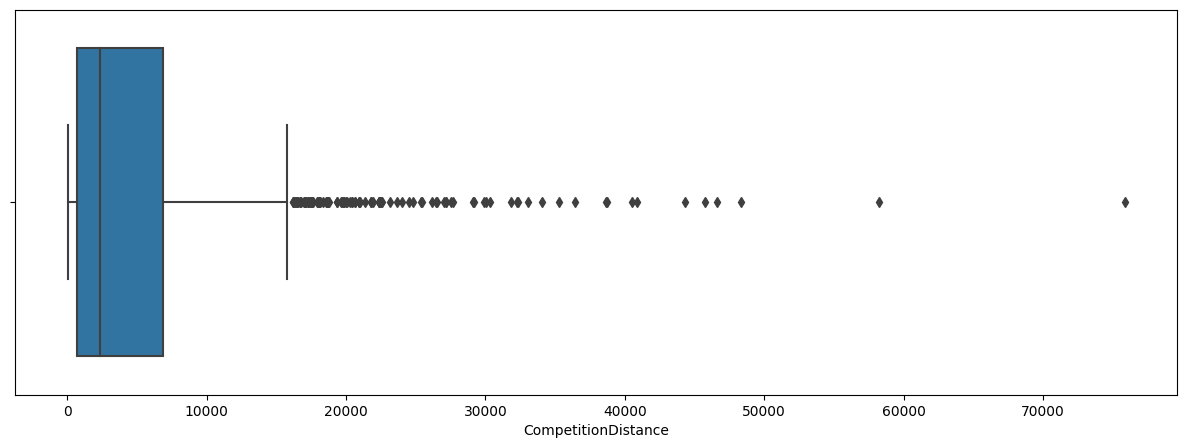

In [86]:
#plotting box plot to analyse the where most of the values are
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"]);

In [87]:
#filling the missing values of Competition Distance with median
df_store['CompetitionDistance'].fillna(value = int(df_store.CompetitionDistance.median()), inplace = True)

The distribution of CompetitionDistance is positively skewed. So it is 
safe to impute missing values with mode or median.

In [88]:
#rechecking the null values in CompetitionDistance
df_store[df_store["CompetitionDistance"].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [89]:
#checking rows with null values in CompetitionOpenSinceMonth column
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [90]:
#checking rows with null values in CompetitionOpenSinceYear column
df_store[df_store['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


<Figure size 1500x500 with 0 Axes>

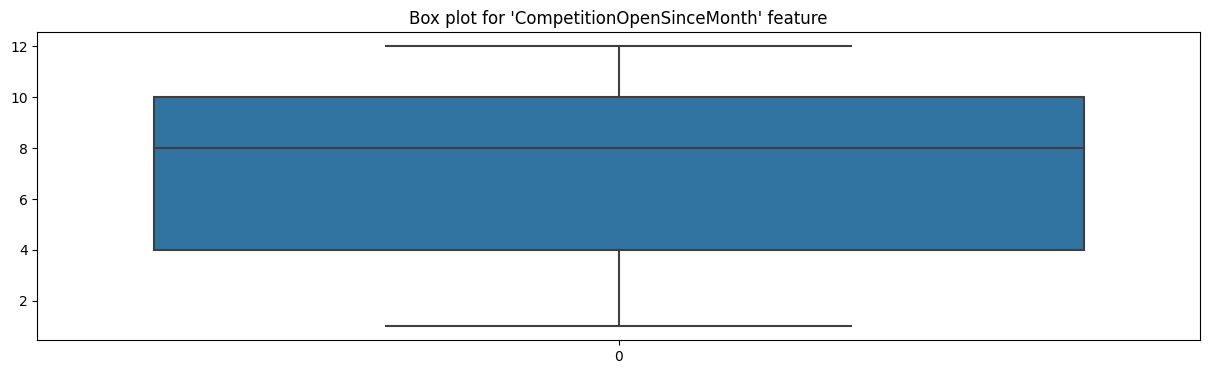

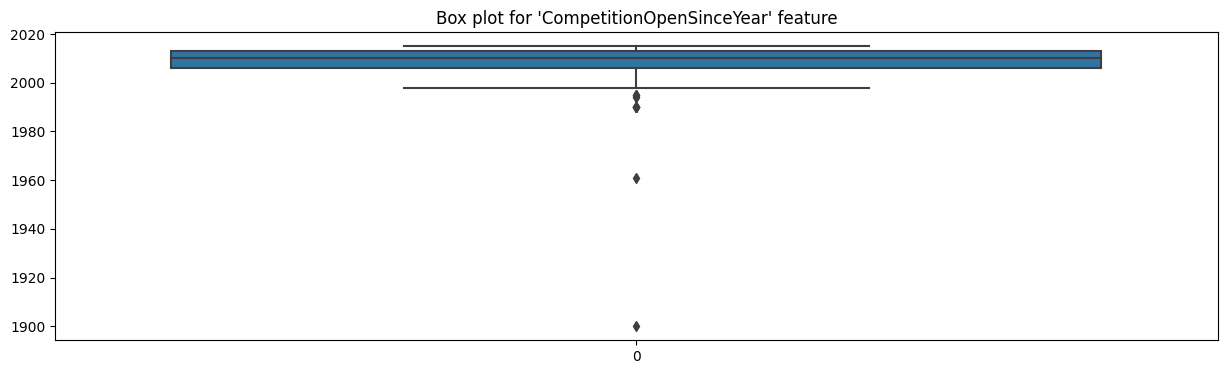

In [91]:
#plotting box plot for CompetitionOpenSinceMonth and CompetitionOpenSinceYear
plt.figure(figsize=(15,5));
x= ["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"];
for i in x:
  plt.figure(figsize=(15,4));
  sns.boxplot(df_store[i]);
  plt.title(f"Box plot for '{i}' feature");
  plt.show();

In [92]:
#filling the missing values with mode
df_store['CompetitionOpenSinceMonth'].fillna(value = df_store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(value = df_store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [93]:
# filling the missing values with value 0 (Promo2SinceWeek, Promo2SinceYear and PromoInterval feature)
df_store["Promo2SinceWeek"].fillna(value = 0, inplace=True)
df_store["Promo2SinceYear"].fillna(value = 0, inplace=True)
df_store["PromoInterval"].fillna(value = 0, inplace=True)

In [94]:
#again checking null values
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now there are no missing values in the dataframe, hence we will proceed for further analysis.

**Merging datasets**

In [95]:
# Write your code to make your dataset analysis ready.

# merging two dataframes on store column using left join
df= df_rossmann.merge(right=df_store,how="left",on="Store")
df.shape

(1017209, 18)

 **Type Casting**

In [96]:
#checking the datatypes for the different columns in the Dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [97]:
# changing dtype into suitable format from both the datasets
df["Date"]= pd.to_datetime(df["Date"])
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [98]:
#again checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [99]:
#Creating new columns for Days, Weeks of the year , month and year for Date column
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day
df["WeekOfYear"]=df["Date"].dt.weekofyear

The distribution of Competition Distance is positively skewed. So it is safe to impute the missing values with mode or median.

### What all manipulations we have done and the insights that we have found?

We have done Data Wrangling in three steps:

* <b>Handling Missing Values</b>- We have observed the missing values in 6 columns

  *   <b>CompetitionDistance </b>- In this column we replaced the missing values with Median (beacuse the data was positively skewed)
  *   <b>CompetitionOpenSinceMonth , CompetitionOpenSinceYear </b>- Missing values in these columns are replaced by their mode value.
  *  <b>Promo2SinceWeek , Promo2SinceYear , PromoInterval</b> - Missing values are replaced by zero

* <b> Merging Dataset</b> - We merged the two datasets using left join, and since there are no null values so the right join or inner join will also give us the same results.

* <b>Typecasting </b> - We have converted <b>Date</b> column to datetime and float variables to integer.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-  Day v/s Sales- Chronical

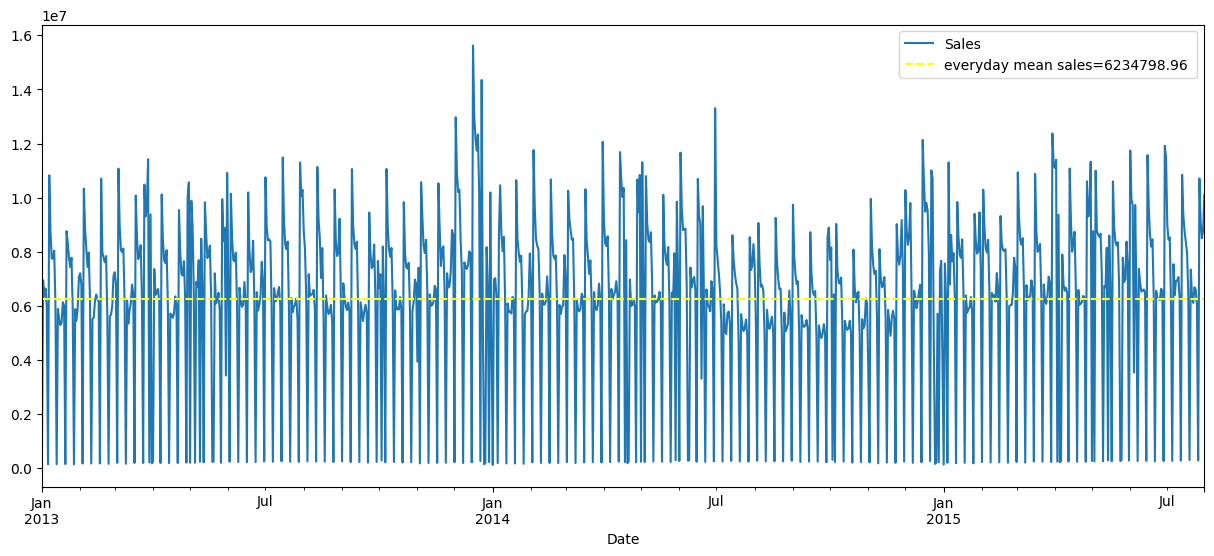

In [100]:
# Chart1 - visualization code

#Visualizing everyday sales with average everyday sales 
fig, ax= plt.subplots(figsize=(15,6))

eday_sales=df.groupby(["Date"]).Sales.sum()
eday_sales.plot(kind="line",ax=ax)
plt.axhline(y=eday_sales.mean(), label=f"everyday mean sales={round(eday_sales.mean(),2)} ",color="yellow", linestyle="--")
plt.legend()


##### 1. Why did we choose the specific chart?

Line Chart was choosen to analyse the total daily sales and then the fluctuations on it. 

##### 2. What are the insights that we found from the chart?

##### 3. Will the gained insights helps in creating a positive business impact? 
Are there any specific insights that leads to negative growth? Justify with specific reason!

From visual analysis, we can conclude that the sales are almost evenly distributed around the average sales which imples that overall daily sales have stabilised and new innovative steps need to be taken to increase the sales.

#### Chart - 2- Sales and Customers- Univariate





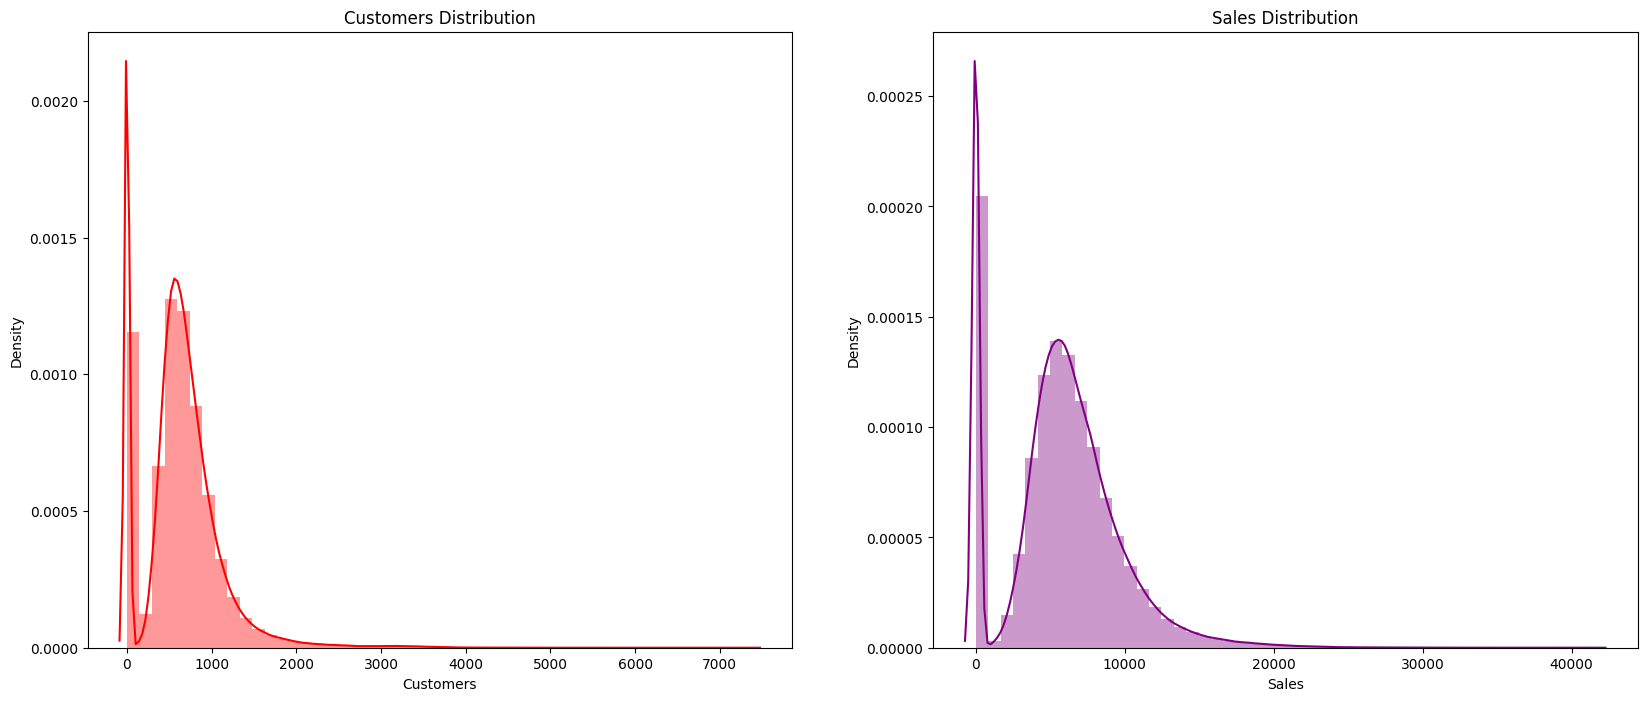

In [101]:
# Chart 2 - visualization code
cont = ['Customers','Sales']
colors = ['red', 'purple', 'blue']
fig, axs = plt.subplots(1, len(cont), figsize = (20, 8))
for c in range(len(cont)):
    sns.distplot(df[cont[c]], color = colors[c], ax = axs[c])
    axs[c].set_title(f'{cont[c]} Distribution')
plt.show()

##### 1. Why did we choose the specific chart?

Beacsue Density plot is used to analyse the frequency Distribution of Customer, Sales

##### 2. What are the insights found from the chart?

Customers and Sales have many values concentrated on zero.


##### 3. Will the gained insights helps in creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales or Customer values concentrated around zero implies closed stores. This has impacted the revenue of the stores.

#### Chart 3 - School holidays- Univariate

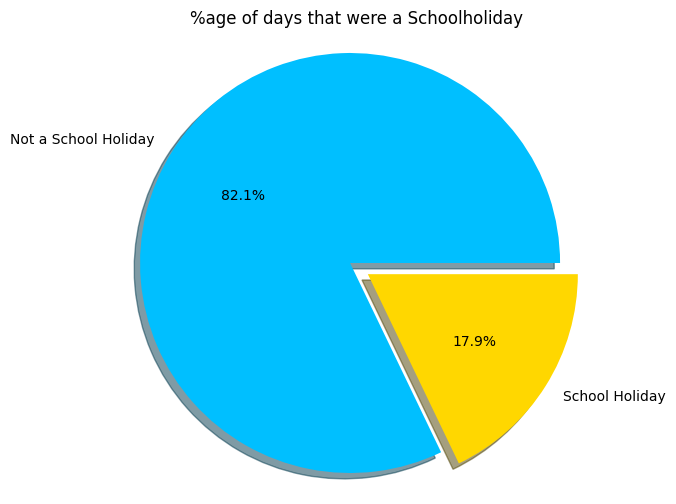

In [102]:
# Chart - 3 visualization code
labels = 'Not a School Holiday' , 'School Holiday'
sizes = df.SchoolHoliday.value_counts()
colors = ['deepskyBlue', 'gold']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("%age of days that were a Schoolholiday ")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [103]:
df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

##### 1. Why did you choose the specific chart?

So that we can analyse the share of days that were school holidays.

##### 2. What are the insights found from the chart?

17% of the days are school holidays.

##### 3. Will the gained insights helps us creating a positive business impact? 
Are there any insights that can lead to negative growth? Justify with specific reason.

Since 17% of the days are school holidays, Rossman stores could use this as an opportunity to target parents and kids as an audience and try to advertise children friendly promotions to increase footfall in the stores on these days.

#### Chart 4 - Stores v/s Sales - Bivariate:

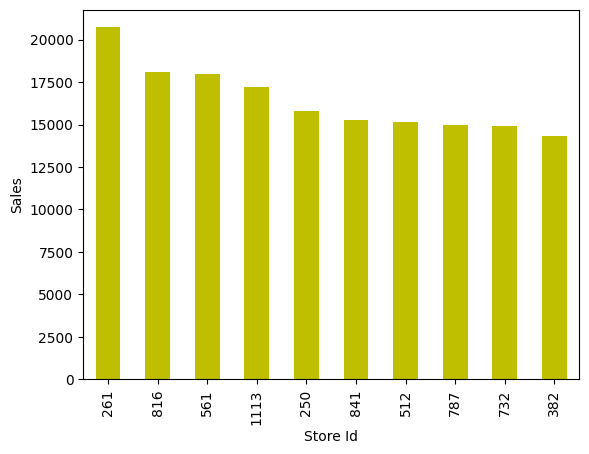

In [104]:
# Chart - 4 visualization code
# top 10 stores with highest average sales
top10stores = df_rossmann.groupby('Store').agg({'Sales': ['mean']}).reset_index()['Sales'].sort_values('mean', ascending = False)[:10]
top10stores['mean'].plot(kind = 'bar', color = 'y')
plt.ylabel('Sales')
plt.xlabel('Store Id')
plt.show()

##### 1. Why did you choose the specific chart?

To compare the average sales of top ten stores.

##### 2. What are the insights found from the chart?

Store 261 has the highest average sales of more than $20000

##### 3. Will the gained insights helps us in creating a positive business impact? 
Are there any insights that can lead to negative growth? Justify with specific reason.

Other stores could try implementing the model of Store Number 262 in daily operations or could also implement their assortment methods to witness increase in sales.


#### Chart - 5- Promo v/s Sales- Bivariate

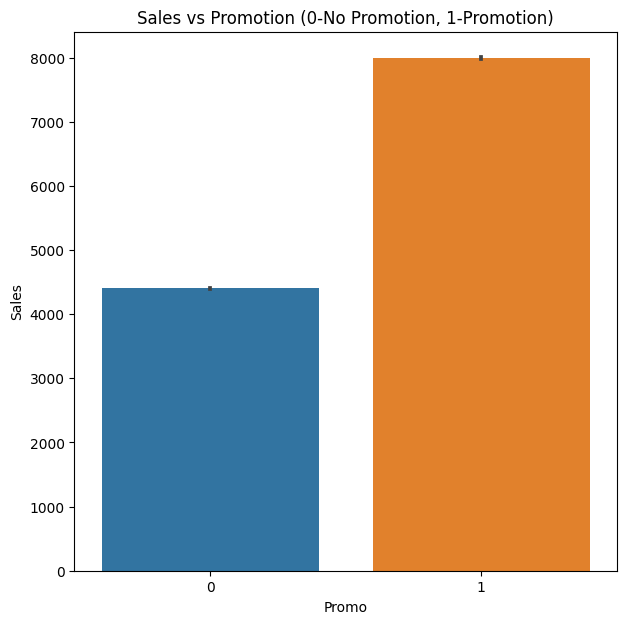

In [105]:
# Chart - 5 visualization code
plt.figure(figsize=(7,7))
ax= sns.barplot(x=df["Promo"], y=df["Sales"])
plt.title("Sales vs Promotion (0-No Promotion, 1-Promotion)");

##### 1. Why did you choose the specific chart?

We choose the bar chart because it can be used to represent the relation between a categorical and continuous variable.

##### 2. What are the insights found from the chart?

There are 2-fold sales with promotions as compared to without promotion sales.

##### 3. Will the gained insights helps us in creating a positive business impact? 
Are there any insights that can lead to negative growth? Justify with specific reason.

Yes, with 2 fold sales observed with promotions. We can say that this technique is working in enhancing the sales of Rossman Stores

#### Chart - 6- Assortment type v/s Customers - Bivariate

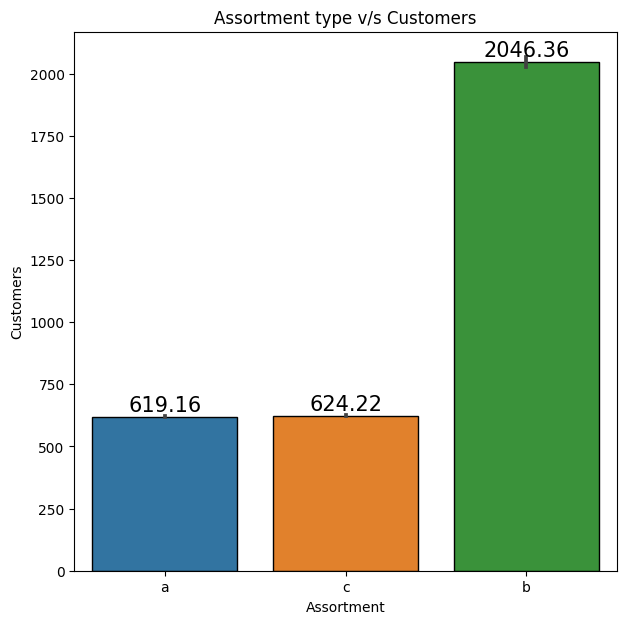

In [106]:


# Assortment vs Customers
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Assortment'],y=df['Customers'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Assortment type v/s Customers")
plt.show()

##### 1. Why did you choose the specific chart?

The bar chart can help us analyse the no. of customers coming in from different assortment type.

##### 2. What are the insights found from the chart?

Assortment type 'b' has the most number of customers

##### 3. Will the gained insights helps us in creating a positive business impact? 
Are there any insights that can lead to negative growth? Justify with specific reason.

Since different stores use different type of assortment techniques, and customers get attracted to assortment techniques too. Hence the assortment technique of type 'b' is very successful in attracting customers.

#### Chart 7 - Store Type vs Sales - Bivariate

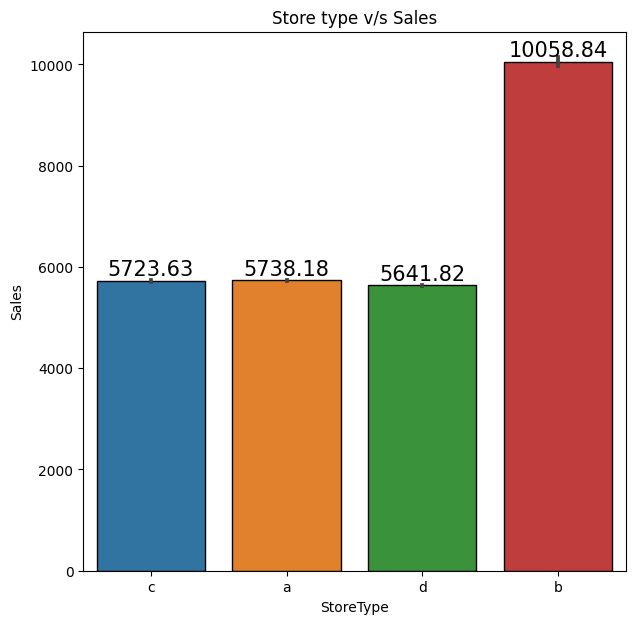

In [107]:
#Store type vs Sales

plt.figure(figsize=(7,7))

#plotting mean sales for each store type
plots=sns.barplot(x=df['StoreType'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Store type v/s Sales")
plt.show()


##### 1. Why did you choose the specific chart?

We choose bar plot to show the mean sales in different stores type.

##### 2. What are the insights found from the chart?

We analysed that the sales in Store type b  was able to make most of the sales  among the all 4 store types.

##### 3. Will the gained insights helps us in creating a positive business impact? 
Are there any insights that can lead to negative growth? Justify with specific reason.

We can see that other store type a , c, d has equal sales but store type b has more sales than others, we could say that store type b has a succesful model. For the next chaet we will try to analyse how many stores are in different types.

#### Chart 8 - Number of Store types-  Univariate

In [108]:
# Chart - 8 visualization code
import plotly.graph_objects as go

# giving colour scheme
colors = ['blue','red','pink','brown']

# counting the number of stores in different store type
values_st=df_store.groupby("StoreType").Store.count()
labels_st=["Store type A","Store type B","Store type C","Store type D"]

# plotting donut chart
fig_store = go.Figure(data = go.Pie(values = values_st, 
                          labels = labels_st, hole = 0.4,
                          title = 'Proportion of Store type',
                          marker_colors = colors
                 ))


fig_store.show()

##### 1. Why did you choose the specific chart?

We choose Donut chart beacuse it is a slightly visually appealing version of a pie chart that is used to represent the proportions.

##### 2. What are the insights found from the chart?

54% of the stores among 1115 stores are of type A

##### 3. Will the gained insights helps us in creating a positive business impact? 
Are there any insights that can lead to negative growth? Justify with specific reason.

Since from the previous chart we have found that the Store type of B has the highest average sales but they are the lowest in number. Rossman stores can try increasing the number of Store of type B to increase their Sales.

#### Chart 9- Sales v/s Customers v/s Promo - Multivariate(Scatter)

Text(0.5, 1.0, 'Sales v/s Customers v/s Promo')

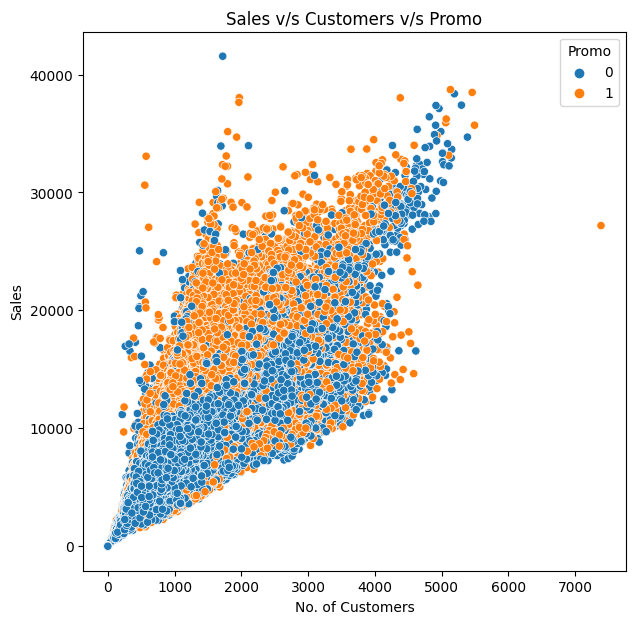

In [109]:
# plotting sales against customers with hues of Promo
plt.figure(figsize=(7,7))

sns.scatterplot(x=df["Customers"],y=df["Sales"], hue=df["Promo"])

plt.xlabel("No. of Customers")
plt.ylabel("Sales")
plt.title("Sales v/s Customers v/s Promo")

##### 1. Why did you pick the specific chart?


We want to find out the relationship of Sales and Customers with Promo so we used a scatter chatter with hues for Promo

##### 2. What is/are the insight(s) found from the chart?



If we draw any vertical line on the chart, We will observe that orange coloured( Promo applied) plots above the blue coloured dots

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

With a vertical line we observe that for same number of customers the sales have increased for Promotion.

Similarly, for a horizontal line, we see the orange dots on the left of blue coloured dots, signifying that Same amount of Sales is achieved for less number of customers with Promotion applied.

#### Chart - 10 - Day of the week v/s Promo - BiVariate

ValueError: ignored

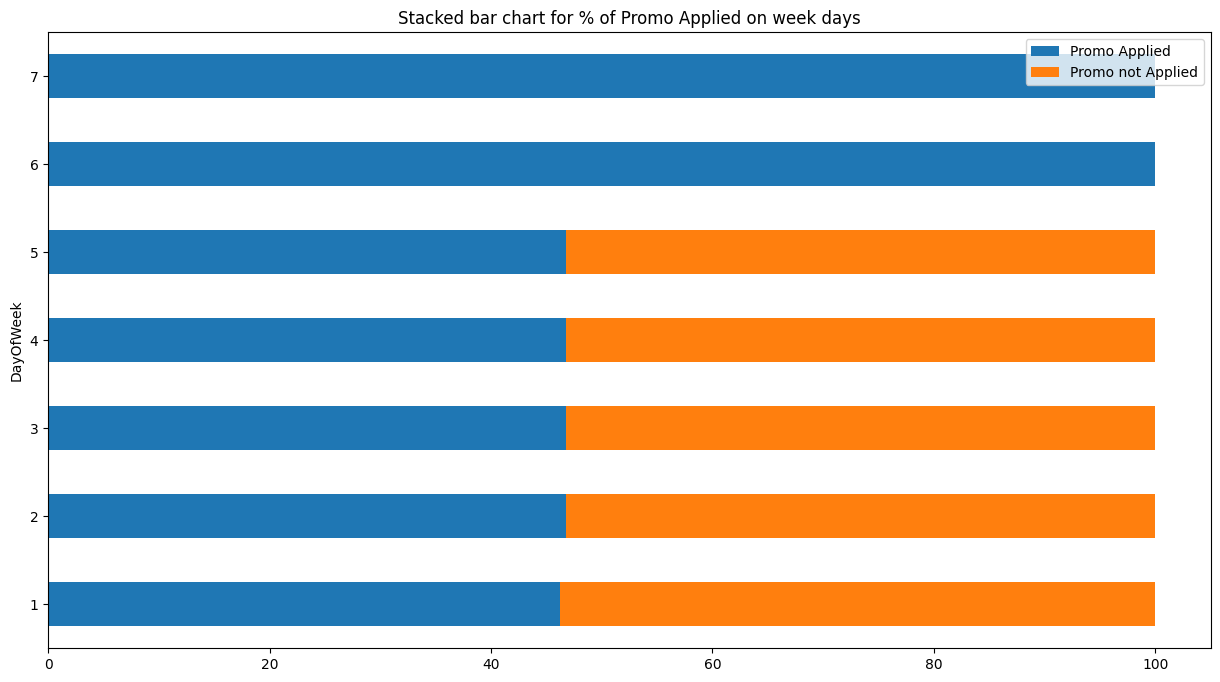

In [110]:
# Chart - 10 visualization code

fig, ax= plt.subplots(figsize=(15,8))
promo_totals=(df[df["Promo"]==0].groupby("DayOfWeek").size()*100/df.groupby("DayOfWeek").size()).sort_values().to_frame()
promo_totals.rename(columns={0: "Promo Applied"},inplace=True)
promo_totals["Promo not Applied"]=[100]*7-promo_totals["Promo Applied"]
promo_totals.plot(kind="barh",stacked=True,ax=ax)
plt.title("Stacked bar chart for % of Promo Applied on week days")
plt.legend(loc="left")
plt.ylabel("Day of Week")
plt.xlabel("Percentage %");

##### 1. Why did you pick the specific chart?

To show the ratio of days on each week of day when promo was applied.

##### 2. What is/are the insight(s) found from the chart?

We found that on Saturday and Sunday ( Day 6,7) promotion has never been applied.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Promo is equally applied on other days except Saturday and Sunday. It should be applied on Saturday and Sunday to increase revenue.

#### Chart - 11- Day of Week and Sales - BiVariate

In [ ]:
# Chart - 11 visualization code

plt.figure(figsize=(7,7))
sns.boxplot(x='DayOfWeek', y='Sales', data=df)
plt.title("Box plt for Sales on a week date");

##### 1. Why did you pick the specific chart?

We used box chart to observe the median of sales of each week day.

##### 2. What is/are the insight(s) found from the chart?

With this box chart we observed that more than 75% of the time Sales on Day 7( Sunday) is zero implying that stores were closed 75% of the time.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since the stores were closed on Sunday most of the time and on more we can see significant sales of Monday. Rossman stores is loosing revenue by closing the stores on a Sunday when most of the people can easily visit the store.

#### Chart - 12- Promo2 v/s Sales- Bivariate

In [ ]:
#Promo2 vs Sales

labels = 'Promo2' , 'Not Promo2'
sizes = df.groupby("Promo2")["Sales"].sum()
colors = ['Orange', 'lightBlue']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%% Sales', shadow=True)
plt.axis('equal')
plt.title("Sales of stores who are into continuous promotion v/s not doing continuous promotion",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show();



##### 1. Why did you pick the specific chart?

To compare proportion of Sales between stores that are doing continous promotion and not holding continuous promotion

##### 2. What is/are the insight(s) found from the chart?

Sales are almost equal between the two type of stores.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Continuous promotions do not seem to have any significant effect on the sales of the stores as can be seen from the equal proportions of the sales.

#### Chart - 13 Sales and Customers v/s Month ( Dual axis plot) Multivariate

In [ ]:
df.columns

In [ ]:
# Chart - 13 visualization code

#find average of sales and customer for month of the year in whole dataset 
monthly_data=df.groupby("Month")[["Sales","Customers"]].mean()

# plotting figures by creating axes object using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Dual Axis Plot to plot Sales and Customers against Month of the year')
 

ax=monthly_data["Customers"].plot(kind= "line" ,color = 'g')

ax2=monthly_data["Sales"].plot(kind= "line" , secondary_y = True,color = 'lightblue',ax=ax)
 
# giving labels to the axises
ax.set_xlabel('Month', color = 'r')
ax.set_ylabel('Customers', color = 'g')
plt.legend()
# secondary y-axis label
ax2.set_ylabel('Sales', color = 'b')

plt.legend()
# show plot
plt.show()


##### 1. Why did you pick the specific chart?

To compare the change in monthly mean of Sales and Customers in overall dataset

##### 2. What is/are the insight(s) found from the chart?

Sales and Customers are closely related

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart reveals a lot of information ablut the sales of Rossman Stores, Maximum sales is done at the end of the year, which is a festival season. Also, number of customers in the stores also increases at that time.

We can clearly see that Sales and Customers is closely related.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot= True,fmt=".2f",cmap=("coolwarm"),square=True)
plt.title('Correlation Heatmap for Rossman Stores and Sales Data', size=20);


##### 1. Why did you pick the specific chart?

To check for correlation among the features visually

##### 2. What is/are the insight(s) found from the chart?

We observe that Sales is highly Correlated with Customers as see from the previous charts.
Also, Sales is highly Correlated with Promo also, showing how promo influences Sales to a high extent.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

#reducing columns and rows for analysis as compution time is high with 10000 rows also
sub_df = df.sample(n=1000)[['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance','Promo2']]
plt.figure()
sns.pairplot(sub_df, hue="Promo", kind="kde", diag_kind="kde");


##### 1. Why did you pick the specific chart?


With correlation chart we tried to see the linear relationship between Columns.

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

##### 2. What is/are the insight(s) found from the chart?

Since most of the columns are categorical, a scatter plot in pair plot will not reveal much information. However we can still confirm from the pair plot using KDE plot that  Zero Sales is Concentrated around Sunday( Day 7) and Open column is zero around Day 7, implying closed store on a Sunday is causing zero sales around Day 7. 

Also with promo=1, the orange line are at the higher end with implying more Sales

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: Promotion and Sales are related to each other (EDA- Chart 5)

Statement 2: Sales and customers are correlated (EDA- Chart 2 and Chart 13)

Statement 3: Day of the week and Promo are related (EDA- Chart 10)

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



```
Null hypothesis: “Promo” and “Sales” are independent to each other.

Alternative hypothesis: “Promo” and “Sales” are dependent to each other.
```



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#importing library for z test
from statsmodels.stats import weightstats as stests

df_promo_1=df[df["Promo"]==1]["Sales"]
df_promo_0=df[df["Promo"]==0]["Sales"]

#applying z-test
ztest ,probability_value = stests.ztest(df_promo_1, df_promo_0,value=0)
print("Z statistic=",ztest)
print("P- value= ",float(probability_value))

#two tailed test
if probability_value<0.025 or probability_value>0.975:
  print("Null hypothesis rejected , Alternative hypothesis accepted")
else:
  print("Null hypothesis accepted")

##### Which statistical test have you done to obtain P-Value?

We have done a Z-test to obtain a P- value

##### Why did you choose the specific statistical test?

We have choosen Z- test here to compare mean of sales when promo was applied and promo was not applied. Null hypothesis that promo and sales are independent implies that difference of mean will be in the 95% confidence range. If the difference of mean is larger than than the 95% confidence interval then promotion application is influencing the mean of sales and hence the sales also. 

Seeing the P- value , and applying two tailed test, we can reject our null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


```
Null hypothesis: “Sales” and "Customers" are having no relation with each other.

Alternative hypothesis: “Sales” and "Customers" are dependent to each other.
```

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# importing library to conduct a pearson correlation test
from scipy.stats import pearsonr
first_sample = df["Customers"]
second_sample = df["Sales"]

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Which statistical test have you done to obtain P-Value?


We have used a Pearson R- test for checking correlation between two numeric variables.

##### Why did you choose the specific statistical test?

Two check relationship between numeric columns, correaltion is a good measure. Thus, we performed our hypothesis testing using pearson r statistic test.

The null hypothesis is that correlation coefficient=0, alternative hypothesis is correlation coefficient is not zero i.e. there is a relation between the two variables.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



```
Null hypothesis: “Promo” and “DayOfWeek” are independent to each other.

Alternative hypothesis: “Promo” and “DayOfWeek” are dependent to each other.
```



#### 2. Perform an appropriate statistical test.

In [ ]:
#Preparing contingency table
contingency_table = pd.crosstab(df['DayOfWeek'], df['Promo'])

observed_value=contingency_table.values
contingency_table

In [ ]:

#choosing chi 2 test as the statistical test
from scipy.stats import chi2
r = 7   # no of rows in contingency table
c = 2   # no of columns in contingency table

#calculating degree of freedom
dof = (r-1) * (c-1)

#expected value table
expected_value= scipy.stats.chi2_contingency(contingency_table)[3]

#chi 2 statistic value
chi_square=sum(sum([(((ov-ev)**2)/ev) for ov,ev in zip(observed_value,expected_value)]))

print("Chi- Square statistic value = ",chi_square)

#alpha=0.05 and degree of freedom=6, obtain p- value
p_value=scipy.stats.chi2.ppf(1-0.05, dof)
print("\n P- value  = ",p_value)

#one tailed test
if chi_square>p_value:
  print("Null hypothesis rejected , Alternative hypothesis accepted")
else:
  print("Null hypothesis accepted")


Since Chi - Square statistic value is greater that P- value, we can reject the null hypothesis and can say that there might be a relationship between "Promo" and "Day of Week"

##### Which statistical test have you done to obtain P-Value?

We have applied a Chi Square test to find the P- value

##### Why did you choose the specific statistical test?

When comparing relationship between two categorical variables we do a Chi - Square test. 

We make a contingency table and using the expected values of contingency table we calculate the statisitc value and compare it with the crtitcal P- value for degree of freedom =6

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

We don't have any missing values. We already removed all missing/null/duplicate values in Data Wrangling section.

We checked all missing/null values of various columns and replaced with median and mode.

### 2. Handling Outliers

Lets check for outliers in competition distance with a box plot.

In [ ]:
#plotting box plot for Sales column to check outliers
plt.figure(figsize=(15,6))
sns.boxplot(df["Sales"]);
plt.title("Box plot for 'Sales' feature")
plt.show()

In [ ]:
#box plot for Competition distance
plt.figure(figsize=(15,6))
sns.boxplot(df["CompetitionDistance"]);
plt.title("Box plot for 'CompetitionDistance' feature")
plt.show()

In [ ]:
# box plot for Customers column
plt.figure(figsize=(15,6))
sns.boxplot(df["Customers"]);
plt.title("Box plot for 'Customers' feature")
plt.show()

In [ ]:
#box plot for CompetitionOpenSinceYear column
plt.figure(figsize=(15,6))
sns.boxplot(df["CompetitionOpenSinceYear"]);
plt.title("Box plot for 'CompetitionOpenSinceYear' feature")
plt.show()

In [ ]:
# Handling Outliers & Outlier treatments
df1=df.copy()
sns.distplot(df1.Sales);
# will be removing rows with zero sales since it has become a bimodal distribution with one mode at zero

In [ ]:
#removing zero sales
df1=df1[df1['Sales']!=0]
sns.distplot(df1.Sales);
plt.title("Sales distribution without zero sales");
# right skewed distribution, we will apply log transformation on sales column

<b>Right skewed distribution, we will apply log transformation on sales column

In [ ]:
#log transformation of sales column
df1["lnSales"]=np.log(df1["Sales"])
sns.distplot(df1.lnSales);
plt.title("Log transformed Sales column" );

In [ ]:
#box plot of lnSales
df1["lnSales"].plot(kind="box");
plt.title("Box plot of Log transformed sales column");


In [ ]:
#Descriptive Statistics of lnSales
df1["lnSales"].describe()

In [ ]:
# we will be treating data outside 3 standard deviation as outlier
sales_mean= round(df1["lnSales"].mean(),2)
sales_std=round(df1["lnSales"].std(),2)

#defining upper bound for outliers
sls_uprbnd=sales_mean+3*sales_std
df1[df1["lnSales"]>sls_uprbnd].shape
df1[df1["lnSales"]>sls_uprbnd].shape[0]/df1["lnSales"].shape[0]
df1[df1["lnSales"]>sls_uprbnd]["lnSales"].plot(kind="hist")
plt.title("Distribution plot for Higher Outlier")
sls_uprbnd

Since for a normal distribution, z-value=+-3 constitutes 99.7% of the values, we are using outside z=+-3 as outliers.

In [ ]:
# checking how many times promotion was going on when stores had abnormally high sales 
df1[df1["lnSales"]>sls_uprbnd].Promo.value_counts()

This implies that promotion does have a impact on sales

In [ ]:
# checking for reasons of abnormally high sales when no promotion was going on
temp=df1[(df1["lnSales"]>sls_uprbnd)] 
temp=temp[temp["Promo"]!=1]
for c in list(temp.columns):
 if c in ["DayOfWeek","StoreType","Month"]:
  print(f" Value counts of {c}")
  print(temp[c].value_counts().head(10))

Upon Analysing the value counts for sales> sls_uprbnd and promotion not applied, we notice the following points:



*   High sales happened mostly in the case of December, in store type 'a' or 'b'
*   Also it happened most of the times when the Day of the week was Saturday(6),Sunday(7) or Monday(1)

So we will not be doing anything with the outliers , since they do not occur randomly.


In [ ]:
# plotting histogram lower outliers
sls_lwrbnd=sales_mean-3*sales_std
df1[df1["lnSales"]<sls_lwrbnd].shape
df1[df1["lnSales"]<sls_lwrbnd].shape[0]/df1["lnSales"].shape[0]
df1[df1["lnSales"]<sls_lwrbnd]["lnSales"].plot(kind="hist")
plt.title("Distribution plot for Lower Outliers");

In [ ]:
#checking counts of promo for Lower sales
df1[df1["lnSales"]<sls_lwrbnd].Promo.value_counts()

Again,Lower sales happen when no promotion was going on

In [ ]:
# checking for reasons of abnormally low sales when promotion was going on
# checking counts of different columns when sales were low
temp=df1[(df1["lnSales"]<sls_lwrbnd)] 
temp=temp[temp["Promo"]!=0]
for c in list(temp.columns):
 if c in ["DayOfWeek","StoreType","CompetitionDistance","Month"]:
  print(f" Value counts of {c}")
  print(temp[c].value_counts().head(10))

Upon Analysing the value counts for sales< sls_lwrbnd and promotion applied, we notice the following points:



*   Low sales have never happened on a Saturday or Sunday 
*   Also it happened most of the times in 'a' Store type or in the 1st quarter, i.e Jan, Feb , March.

So we will not be doing anything with the outliers , since they do not occur randomly.

<b>Now we will be checking for the outliers of Competition Distance

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"])
plt.title("Box plot for CompetitionDistance column");

In [ ]:
#scatter plot for CompetitionDistance column
sns.scatterplot(df1["CompetitionDistance"],df1["Sales"])
plt.title("Scatter plot for CompetitionDistance column");

In [ ]:
#Descriptive statistics for Competition Distance
df1["CompetitionDistance"].describe()

In [ ]:
#Descriptive statistics for Competition Distance
df1["CompetitionDistance"].describe()

<u><b>Checking how sales is distributed among the quantiles of Competition Distance

In [ ]:
#calculating total sales
totalsales=df1["Sales"].sum()
# sales between subsequent quantiles
sumsales_a=round(df1[df1["CompetitionDistance"]<710].Sales.sum()/totalsales,2)
sumsales_b=round(df1[(df1["CompetitionDistance"]<2325) & (df1["CompetitionDistance"]>=710) ].Sales.sum()/totalsales,2)
sumsales_c=round(df1[(df1["CompetitionDistance"]<6880) & (df1["CompetitionDistance"]>=2325)].Sales.sum()/totalsales,2)
sumsales_d=round(df1[df1["CompetitionDistance"]>=6880].Sales.sum()/totalsales,2)

print("Proportion of sales distributed among Competiton Distance quantiles:")
[sumsales_a,sumsales_b,sumsales_c,sumsales_d]
# we can see that sales get evenly divided when we divide the competition distance into 4 parts, based on 1st,2nd and 3rd quantile values of Competition Distance.

We will be encoding <b>Competitiondistance </b> as 1,2,3,4.
 
1 signifying that the competition is closely located and 4 signifying that the competition is far away

From the Scatter plot also we can notice that sales density decreased (plot became more sparse) as Competition distance increased.

### **3. Categorical Encoding**

In [ ]:
# encoding competition distance as 1,2,3,4 based on the values of Quantile
def dist_code(x):
  if(x<710):
    return(1)
  elif(x>=710 and x<2325):
    return(2)
  elif(x>=2325 and x<6880):
    return(3)
  elif(x>=6880):
    return(4) 
df1["CompetitionDistanceCode"]=list(map(dist_code,df1["CompetitionDistance"]))

# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1}).fillna(0)

print(df1["CompetitionDistanceCode"].value_counts())

In [ ]:
#value counts of State holiday
df1["StateHoliday"].value_counts()

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. We have categorically encoded Competition distance and reduced the categories in State Holiday column
2. We will be dealing with ordinal categories by categorically encoding them using pd.dummies a little ahead in the notebook.

### **4. Feature Manipulation & Selection**

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# correlation map to check collinearity 
corr_map=df1.corr()
plt.rcParams['figure.figsize'] = 13,13
sns.heatmap(corr_map,annot=True, fmt=".2f", cmap="coolwarm");

<b><u>Creating a new feature Promo2Open to Calculate the total time in months that the store has been using continuous promotions

In [ ]:
#creating a new feature Promo2Open to Calculate the total time in months that the store has been using continuous promotions
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + abs(df1['WeekOfYear'] - df1['Promo2SinceWeek'])*(7/(365/12))
df1["PromoInterval"].unique()

In [ ]:
# Since unique values in Promo Interval were only 4, we used map function to map the values to a list containing the corresponding month number
df1["PromoInterval"]=df1["PromoInterval"].map({'Jan,Apr,Jul,Oct':[1,4,7,10],'Feb,May,Aug,Nov' :[2,5,8,11] ,'Mar,Jun,Sept,Dec' :[3,6,9,12]}).fillna(0)

df1["PromoInterval"]


Creating a new feature Promo2_active which will record if Promo2 was running in that month by checking promointerval column and Promo2 and the month of the sales


In [ ]:
#creating a new feature Promo2_active which will record if Promo2 was running in that month by checking promointerval column and Promo2 and the month of the sales
def pr2_run(k):
  if k["PromoInterval"]==0:
    return 0
  elif k["Month"]  in k["PromoInterval"] and k["Promo2"]==1:
    return 1
  else:
    return 0

df1["Promo2_active"]=df1.apply(pr2_run, axis=1)

In [ ]:
# checking value counts for Promo2_active 
df1["Promo2_active"].value_counts()

<b><U>Creating Competitionopensincemonths to capture the total duration in months instead of weeks and year

In [ ]:
#Creating Competitionopensincemonths to capture the total duration in months instead of weeks and year

df1['Competitionopensincemonths'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + abs(df1['Month'] - df1['CompetitionOpenSinceMonth'])

#### **2. Feature Selection**

In [ ]:
# columns to be dropped
drop_feature=['Sales', 'Customers', 'Open','CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'day']
df1.drop(columns=drop_feature, inplace=True)

In [ ]:
#checking columns after dropping
(df1.columns)

##### What all feature selection methods have you used  and why?

We have combined feature that were correlated with each other. 

Eg-  

*   'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval' were highly correlated as we can see from the correlation heat map and thus we combined them into two new features
*   'CompetitionOpenSinceMonth','CompetitionOpenSinceYear' were also correlated, so we combined them into a new feature
*  We distributed Competition Distance into Quantiles and formed a new categorical variable after observing similar sales distribution.



##### Which all features you found important and why?

We found out that promo is highly correlated with sales and can be a good indicator of high sales, and promo2open and promo2 active will aslo be helpful in deciding the sales considering the fact that continuous promotions will always attract customers.

### **5. Data Transformation**




#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Encoding Nominal Categorical Columns 
df_new=pd.get_dummies(df1, dtype=int, drop_first=True)
df_new.head()

In [ ]:
#checking new columns after transforming categorical features
df_new.columns



<B>Checking Again for multicollinearity using VIF values

In [ ]:
#creating a data frame to save VIF values
vif = pd.DataFrame()
temp=df_new[[ 'Store', 'DayOfWeek',  'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']].copy()
vif["variables"] = temp.columns
vif["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]

In [ ]:
#printing VIF values
vif

The VIF values are below 10 and hence are in acceptable ranges of Multicollinearity.

### **6. Data Scaling**

In [ ]:
# Scaling your data
df_scale=df_new.copy()

#instantiating Standard Scaler object
std_scaler= StandardScaler()

# Applying standard scaler
df_scale[['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear',  'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']]= std_scaler.fit_transform(df_scale[['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear',  'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']])

# df_scale[['Promo2Open','Competitionopensincemonths']]=std_scaler.fit_transform(df_scale[['Promo2Open','Competitionopensincemonths']])

In [ ]:
#checking again for correlation using correlation heat map
corr_map=df_scale.corr()
plt.rcParams['figure.figsize'] = 13,13
sns.heatmap(corr_map,annot=True, fmt=".2f", cmap="coolwarm");

##### Which method have you used to scale you data and why?


We have used a standard scaler to scale our values since some features were having too much difference between their lowest and highest values.

### 7. Dimesionality Reduction - Not Applied

### **8. Data Splitting**

In [ ]:
# Split data into train and test. 
# start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train= df_scale[df["Date"]<=end_train]
#test
start_test = pd.to_datetime("2015-06-15")
# end_test = pd.to_datetime("2015-07-31")
df_test = df_scale[df["Date"]>end_train]

In [ ]:
#checking the train data
df_train.head()

In [ ]:
#Splitting the data into features and target
X_train=df_train[['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']]
X_test=df_test[['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']]
y_train,y_test=df_train[['lnSales']],df_test[['lnSales']]

In [ ]:
#Dropping Date columns
X_train.drop(columns=["Date"],inplace=True)
X_test.drop(columns=["Date"],inplace=True)

##### What data splitting ratio have you used and why? 

No ratio has been used for splitting data. Instead we have taken the latest six week data from the dataset as the test value.

### 9. Handling Imbalanced Dataset - Not Applied

## ***7. ML Model Implementation***

### ML Model - 1- Linear Regression ( Baseline Model)

This model will be our baseline model and will help us in analysing if we are making any progress with the other models. Although we are using  other metrics also, we can compare metrics achieved with this model to analyse the performance of future models

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# ML Model - 1 Implementation
np.random.seed(42)  # for reproducible results
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(X_train,y_train)

# Predict on the model
y_train_regression_pred= linear_regressor.predict(X_train)
y_test_regression_pred= linear_regressor.predict(X_test)

<u>Checking the coefficients:


In [ ]:
# len(linear_regressor.coef_.tolist())
linear_regressor.coef_[0]

In [ ]:
# Checking the coefficients
temp=pd.DataFrame()
temp["Features"]=X_train.columns
temp["Coefficients"]=linear_regressor.coef_[0].tolist()
temp.sort_values(by=["Coefficients"],ascending= False, inplace= True)
sns.barplot(temp["Coefficients"],temp["Features"])
plt.title(" Feature Importances")


Explaining the model result:

Analysing the coeffcients of Feature importances for this model, we observe the following points:


*   Promo has the highest +ve impact on sales 
*   Store type 'b' and 'c' also contribute towards sales
*   Promo 2 also has a positive impact on sales
*   Day of the week has -ve impact on sales
* CompetitionDistanceCode also has negative impact in sales



Checking the intercept:

In [ ]:
# Checking the intercept
linear_regressor.intercept_[0]

<u>Making a function to the calculate metrics for analysing model performance 

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(model_name,y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)

  # converting log values back to original values
  y_train_actual,y_train_pred,y_test_actual,y_test_pred=np.exp(y_train_actual),np.exp(y_train_pred),np.exp(y_test_actual),np.exp(y_test_pred)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train_actual,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test_actual,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train_actual, y_train_pred)
  MSE_test  = mean_squared_error(y_test_actual, y_test_pred)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train_actual, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test_actual, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train_actual,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test_actual,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

  # returning the metrics as a list
  global comparison_columns
  comparison_columns = ['Model_Name', 'Train_MAE', 'Train_RMSE', 'Train_R2', 'Train_MAPE' , "Train_Accuracy",'Test_MAE', 'Test_RMSE', 'Test_R2','Test_MAPE',"Test Accuracy"]
  metric_scores = [model_name,MAE_train,RMSE_train,R2_train,MAPE_train, Accuracy_train ,MAE_test,RMSE_test,R2_test, MAPE_test,Accuracy_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

<b>Creating a function to add metrics to a dataframe metric_df for final presentation 

In [ ]:
metric_list = []
def add_to_metric_df(dict_list):
  global metric_list
  for elem in dict_list:
    metric_list.append(elem)
  global metric_df
  metric_df = pd.DataFrame(metric_list, columns= comparison_columns)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
a=regression_metrics("Linear Regression", y_train,y_train_regression_pred,y_test,y_test_regression_pred)

<U>Visualising Residual Plot

In [ ]:
# creating a residual plot by first transfroming the log values back to original values
residuals = np.exp(y_test) - np.exp(y_test_regression_pred)
res_mean=residuals.mean().values.round(2)
plt.figure(figsize=(15,8))
plt.scatter(np.exp(y_test), residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Applying cross validation to check for improvements
np.random.seed(42)  # for reproducible results
Glinear_regressor= LinearRegression()
parameters = {'fit_intercept':[True,False]}
Grid_reg = GridSearchCV(Glinear_regressor,parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
Grid_reg.fit(X_train,y_train)
# Predict on the model
y_train_gridreg_pred = Grid_reg.predict(X_train)
y_test_gridreg_pred = Grid_reg.predict(X_test)

print(f"The best alpha value found out to be: {Grid_reg.best_params_}")
print(f"Negative mean square error is: {Grid_reg.best_score_}")

In [ ]:
#coefficients after hyperparamenter and crossvalidation
Grid_reg.best_estimator_.coef_

In [ ]:
#intercept after hyperparamenter and crossvalidation
Grid_reg.best_estimator_.intercept_

In [ ]:
#printing the performance metric for the model
lin_reg_met=regression_metrics("Linear Regression",y_train,y_train_gridreg_pred,y_test,y_test_gridreg_pred)

In [ ]:
#adding metrics obtained from this model to metric_df
add_to_metric_df(lin_reg_met)

##### Which hyperparameter optimization technique have you used and why?

Only hyperparameter used was fit intercept. Linear Regression presents itself with very little option for hyperparameter optimization since it is the simplest model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


No improvement in metrics after cross validation, since the data with which we trained the Linear Regression model already has a lot of information. Training with Cross Validation will not help in improving the best fit line


<b>Overall, seeing the R2 value of 0.18 on train data, Linear Regression model has not performed upto our expectation. It has scored Accuracy  (=1- MAPE) of 69% on train data.</b>


### **ML Model - 2- Elastic Net**


Elastic net is a variation of Linear Regression and is a regularization technique to reduce the overshadowing (if any exists) of a feature over other features. This model is a combination of Lasso and Ridge regression. Since we have very small coefficients and no feature has particular shadowing effect on the target variable, we expect very little improvements in the model performance. We will be directly going to hyperparameter tuning to obtain the best parameter.

In [ ]:
# ML Model - 2 Implementation
el_net= ElasticNet()

# parameters for hypertuning
parameters_el_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

#instantiating gridsearchcv
Gridel_net = GridSearchCV(el_net, parameters_el_net, scoring='neg_mean_squared_error', cv=5)

# Fitting the Algorithm
Gridel_net.fit(X_train,y_train)

In [ ]:
# Predict on the model
y_train_el_net_pred = Gridel_net.predict(X_train)
y_test_el_net_pred = Gridel_net.predict(X_test)

print(f"The best alpha value found out to be: {Gridel_net.best_params_}")
print(f"Negative mean square error is: {Gridel_net.best_score_}")

In [ ]:
#plotting the feature importances
Gridel_net.best_estimator_.coef_
# Checking the coefficients
temp=pd.DataFrame()
temp["Features"]=X_train.columns
temp["Coefficients"]=Gridel_net.best_estimator_.coef_.tolist()
temp.sort_values(by=["Coefficients"],ascending= False, inplace= True)
sns.barplot(temp["Coefficients"],temp["Features"])
plt.title(" Feature Importances (Elastic Net)");

**Elastic Net model has a similar result with respect to Linear Regression 
model, except for the fact that Store column has been totally eliminated which indicates store number has least impact on the sales.**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
el_net_met=regression_metrics("Elastic Net",y_train,y_train_el_net_pred,y_test,y_test_el_net_pred)

In [ ]:
#to add to metric_df the performance of the model
add_to_metric_df(el_net_met)

In [ ]:
#plotting the residual plot with a scatter chart
y_test_el_net_pred=pd.DataFrame(y_test_el_net_pred).values
residuals =np.exp(y_test) - np.exp(y_test_el_net_pred)
res_mean=residuals.mean().values.round(2)
plt.figure(figsize=(15,8))
plt.scatter(np.exp(y_test), residuals, c="orange")
plt.title("Residual Plot for Metric Evaluation (ELASTIC NET)")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here if we observe the Mean absolute Error, there is no improvement in it if we compare it from previous Linear Regression model. Hence if we apply this model, on an average we might be away from the predictions by $2000(approx).


Since, the Linear Regression and Elastic Net model have worked on the same lines,  we have observed same trend in the residual error for both models.

For outliers, these two models have predicted values greater than expectations (example- a value that has actual value of 40,000, was predicted about 75,000)

Seeing the density plot of Sales feature, the Residual error is concentrated around zero near the mean of sales data (where the density is highest).

**One positive thing (from Business point of view) is that our model, at no instance, has predicted low sales for the time when there is supposed to be an exceptionally high sales. **

### **ML Model - 3- Decision Tree**

Now, Starting with Decision Tree, we will be applying complex models on our data to observe improvement in predictions

In [ ]:
# ML Model - 3 Implementation
# import the Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
Dt_reg= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the Decision Tree model
Griddecision_tree = GridSearchCV(Dt_reg, parameters, scoring='neg_mean_squared_error', cv=5)
Griddecision_tree.fit(X_train,y_train)

In [ ]:
# Predict the output
y_train_grid_Dt_pred = Griddecision_tree.predict(X_train)
y_test_grid_Dt_pred = Griddecision_tree.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {Griddecision_tree.best_params_}")
print(f"Negative mean square error is: {Griddecision_tree.best_score_}")

In [ ]:
#type casting the the output received from the model
y_test_grid_Dt_pred=pd.DataFrame(y_test_grid_Dt_pred).values

#creating a dataframe with predicted and actual sales values
plt.figure(figsize=(15,8))
a=pd.DataFrame()
a["Sales"] = np.exp(y_test)["lnSales"].copy()
a['Pred_Sales'] = np.exp(y_test_grid_Dt_pred)
a["Date"]=(df[df["Date"]>end_train]["Date"])
a=a[["Date","Sales","Pred_Sales"]]
df_plot = a.copy()
plot = df_plot.groupby(['Date'])['Sales','Pred_Sales'].sum()
# plotting plot dataframe
sns.lineplot(data=plot)

plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)
plt.title("Actual Sales on a day v/s Predicted sales on a day")

plt.legend();

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating Regression Metrics
dt_met=regression_metrics("Decision Tree",y_train,y_train_grid_Dt_pred,y_test,y_test_grid_Dt_pred)

A <b>decision tree</b> is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

As compared to Linear regression and Elastic Net, we have observed major improvement in our performance with  Decision Tree Model with best parameter for max tree length as 18 for the model.

The R2 score now is 0.73 on train data and accuracy is of 83%. Seeing the R2 score, and knowing that Decision Tree models are susceptible to Overfitting,<b> we will attempt an ensemble technique(BAGGING) with our next model by applying Random Forest model.

In [ ]:
#adding to metric_df
add_to_metric_df(dt_met)

### **ML Model - 4- Random Forest**


In [ ]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
Rf_reg= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [17,19,20], 'min_samples_leaf': [1, 2]}

# Train the model
GridRf_reg = RandomizedSearchCV(Rf_reg, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
GridRf_reg.fit(X_train,y_train)



In [ ]:
# Predict the output
y_train_grid_Rf_pred = GridRf_reg.predict(X_train)
y_test_grid_Rf_pred = GridRf_reg.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {GridRf_reg.best_params_}")
print(f"Negative mean square error is: {GridRf_reg.best_score_}")

In [ ]:
# Calculating Regression Metrics
rf_met=regression_metrics("Random Forest",y_train,y_train_grid_Rf_pred,y_test,y_test_grid_Rf_pred)

In [ ]:
# test casting the predicted value
y_test_grid_Dt_pred=pd.DataFrame(y_train_grid_Rf_pred).values

In [ ]:
plt.figure(figsize=(15,8))
a = pd.DataFrame()
a["Sales"] = np.exp(y_test)["lnSales"]
a['Pred_Sales'] = np.exp(y_test_grid_Rf_pred)
a["Date"]=(df[df["Date"]>end_train]["Date"])
a=a[["Date","Sales","Pred_Sales"]]
df_plot = a.copy()
plot = df_plot.groupby(['Date'])['Sales','Pred_Sales'].sum()
sns.lineplot(data=plot)

plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)
plt.title("Actual Sales on a day v/s Predicted sales on a day for Random Forest Model")

plt.legend();

In [ ]:
#adding the performance metrics to metric_df
add_to_metric_df(rf_met)

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We will be making our decision of choosing the model based on R2 score, since it is a very good indicator of possibilty of variance on test data also.  Based on the values of metric obtained from different models, Random Forest Model would be the model choosen for predicting Sales.

 Our models are not doing good in predicting the values at extreme points, which could have been handled by removing the outliers in Sales, but by not removing the outliers we get the right indication for high sales if not the exact value. For a business like Rossmann store, keeping stock for average sales would be necessary at all times. But if we miss the opportunity for high sales ,we will have far more than just monetary impact. It will also impact the image of Rossmann store as a drug/ parmaceutical store not being able to provide necessary items.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

<b>Feature Importances


In [ ]:
#plotting feature importances of Random Forest model
features = X_train.columns
importances = GridRf_reg.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importance for Random Forest model', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


In [ ]:
#loading LIME explainer with train data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),verbose=True, mode='regression')

In [ ]:
# Choose the 100th instance of test data and use it to predict the results
j = 100
exp = explainer.explain_instance(X_test.values[j],GridRf_reg.predict, num_features=6)
exp.show_in_notebook(show_table=True)
# output not showing in github, so we are saving it as an html file
#exp.save_to_file('/content/drive/MyDrive/AlmaBetter/Capstone_Project_2/lime.html')

A <b>Random Forest</b> is a supervised machine learning algorithm that is constructed from decision tree algorithms. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

Random Forest is a black box model so we would use model agnostic approach to explain it with LIME.

According to LIME explainer, When we analyse our trained Random Forest Model:


*  <u> Promotions</u> have a postive impact, 
*  <u> Store type b</u> and <u>assortment c</u> will also impact the sales
*   Continuing promotions (<u>promo2open</u>) will impact positively also with      <U>competition distance</u>
* <u>competitionopensincemonths</u> will have a negative impact on sales

These all are the <b>6 most important features according to LIME 


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

filename = '/content/drive/MyDrive/AlmaBetter/Capstone_Project_2/finalRFmodel.sav'

#Already saved the file hence the commented code
# pickle.dump(GridRf_reg, open(filename, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
RFpick_model = pickle.load(open(filename, 'rb'))
result = RFpick_model.score(X_test, y_test)
y_train_pic_Rf_pred = RFpick_model.predict(X_train)
y_test_pic_Rf_pred = RFpick_model.predict(X_test)
rfpic_met=regression_metrics("Random Forest",y_train,y_train_pic_Rf_pred,y_test,y_test_pic_Rf_pred)

plt.figure(figsize=(15,8))
a=pd.DataFrame()
a["Sales"]= np.exp(y_test)
a['Pred_Sales'] = np.exp(y_test_pic_Rf_pred)
a["Date"]=(df[df["Date"]>end_train]["Date"])
a=a[["Date","Sales","Pred_Sales"]]
df_plot = a.copy()
plot = df_plot.groupby(['Date'])['Sales','Pred_Sales'].sum()
sns.lineplot(data=plot)

plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)
plt.title("Actual Sales on a day v/s Predicted sales on a day for Random Forest Model")

plt.legend();


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We have now completed the project with Random Forest model and saved the model to a file using pickle so we do not have to train the model again and again. We have decided to use Random Forest for predicting our values. overall we noticed imrovement in all models as we moved ahead. Here is a table will all the metric values analysed for seeing the performance.

In [ ]:
metric_df

Clearly, Random Forest is outperforming other models in terms of each metric. And overall accuracy of the model is improved in predicting values. Thus the ensemble technique (Bagging) applied after has given us improved results and reduced our Mean absolute error to $761.

Overall, this project has helped us do hands on EDA on sales data, do hypothesis testing from the hypothesis formulated from the EDA. Also we did apply feature engineering and model agnostic approach to explain a model for the first time. Pickling a model to save for future use was also an enhancing experience. 

.

<b>Challenges Faced:</b>


*   Very high computation time for some charts like pair plot and also for fitting for Decision Tree Regressor and Random Forest Model 
*   Handling Null values and Outliers

<b> Resources:</b>
* Scipy documentation
* Almabetter recorded lectures
*Geek for Geeks
*kaggle.com
*towardsdatascience.com

